In [3]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('Merged.csv')

# Display the first few rows of the dataframe
df.head()

,Grade,Tensile Strength (MPa),Yield Strength (MPa),Elongation in 50 mm (%),Reduction in Area (%),HV (GPa),"Carbon, C","Chromium, Cr","Iron, Fe","Manganese, Mn",...,"Phosphorus, P","Silicon, Si","Sulfur, S","Molybdenum, Mo","Boron, B","Titanium, Ti",Nb,Ta,"Lead, Pb","Vanadium, V"
0,347,655.0,275.0,45.0,45.8,9.203853,0.080,17.000,68.0000,2.000,...,0.045,1.000,0.03,NaN,NaN,NaN,0.4,0.4,NaN,NaN
1,347,620.0,240.0,50.0,65.0,15.494393,0.080,17.000,68.0000,2.000,...,0.045,1.000,0.03,NaN,NaN,NaN,0.4,0.4,NaN,NaN
2,384,690.0,450.0,40.0,60.0,20.530071,0.080,16.000,63.0000,2.000,...,0.045,1.000,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,384,515.0,240.0,55.0,72.0,7.786422,0.080,16.000,63.0000,2.000,...,0.045,1.000,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,304,585.0,235.0,60.0,70.0,14.429154,0.505,0.525,97.8307,0.875,...,0.035,0.225,0.04,NaN,0.0018,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df[df['Iron, Fe'] >= 50]
df.reset_index(drop=True, inplace=True)  # Reset the index after dropping rows

In [5]:
# Define the ranges for Iron, Fe
ranges = {
    "90-100": df[(df['Iron, Fe'] >= 90) & (df['Iron, Fe'] <= 100)].shape[0],
    "80-90": df[(df['Iron, Fe'] >= 80) & (df['Iron, Fe'] < 90)].shape[0],
    "70-80": df[(df['Iron, Fe'] >= 70) & (df['Iron, Fe'] < 80)].shape[0],
    "60-70": df[(df['Iron, Fe'] >= 60) & (df['Iron, Fe'] < 70)].shape[0],
    "50-60": df[(df['Iron, Fe'] >= 50) & (df['Iron, Fe'] < 60)].shape[0],
}

# Print the counts for each range
for range_label, count in ranges.items():
    print(f"Rows with Iron, Fe in range {range_label}: {count}")

Rows with Iron, Fe in range 90-100: 253
Rows with Iron, Fe in range 80-90: 14
Rows with Iron, Fe in range 70-80: 14
Rows with Iron, Fe in range 60-70: 31
Rows with Iron, Fe in range 50-60: 8


In [6]:
import numpy as np

# Iterate over each range and augment data to have approximately 250 rows for each range
for range_label, count in ranges.items():
    if count < 250:
        rows_needed = 250 - count
        range_min, range_max = map(float, range_label.split('-'))
        range_data = df[(df['Iron, Fe'] >= range_min) & (df['Iron, Fe'] < range_max)]
        if not range_data.empty:  # Check if range_data is not empty
            augmented_data = range_data.sample(n=rows_needed, replace=True).copy()
            for column in ['Tensile Strength (MPa)', 'Yield Strength (MPa)', 'Elongation in 50 mm (%)', 'Reduction in Area (%)', 'HV (GPa)']:
                augmented_data[column] += np.random.normal(0, 0.5, size=rows_needed)  # Add small random noise
            df = pd.concat([df, augmented_data], ignore_index=True)


In [7]:
df.to_csv('Augmented_Merged1.csv', index=False)

In [8]:
# Define the ranges for Iron, Fe
ranges = {
    "90-100": df[(df['Iron, Fe'] >= 90) & (df['Iron, Fe'] <= 100)].shape[0],
    "80-90": df[(df['Iron, Fe'] >= 80) & (df['Iron, Fe'] < 90)].shape[0],
    "70-80": df[(df['Iron, Fe'] >= 70) & (df['Iron, Fe'] < 80)].shape[0],
    "60-70": df[(df['Iron, Fe'] >= 60) & (df['Iron, Fe'] < 70)].shape[0],
    "50-60": df[(df['Iron, Fe'] >= 50) & (df['Iron, Fe'] < 60)].shape[0],
}

# Print the counts for each range
for range_label, count in ranges.items():
    print(f"Rows with Iron, Fe in range {range_label}: {count}")

Rows with Iron, Fe in range 90-100: 253
Rows with Iron, Fe in range 80-90: 250
Rows with Iron, Fe in range 70-80: 250
Rows with Iron, Fe in range 60-70: 250
Rows with Iron, Fe in range 50-60: 250


In [9]:
print(len(df))
df.fillna(0, inplace=True)
print(len(df))

1253
1253


In [10]:
df.head()

,Grade,Tensile Strength (MPa),Yield Strength (MPa),Elongation in 50 mm (%),Reduction in Area (%),HV (GPa),"Carbon, C","Chromium, Cr","Iron, Fe","Manganese, Mn",...,"Phosphorus, P","Silicon, Si","Sulfur, S","Molybdenum, Mo","Boron, B","Titanium, Ti",Nb,Ta,"Lead, Pb","Vanadium, V"
0,347,655.0,275.0,45.0,45.8,9.203853,0.080,17.000,68.0000,2.000,...,0.045,1.000,0.03,0.0,0.0000,0.0,0.4,0.4,0.0,0.0
1,347,620.0,240.0,50.0,65.0,15.494393,0.080,17.000,68.0000,2.000,...,0.045,1.000,0.03,0.0,0.0000,0.0,0.4,0.4,0.0,0.0
2,384,690.0,450.0,40.0,60.0,20.530071,0.080,16.000,63.0000,2.000,...,0.045,1.000,0.03,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
3,384,515.0,240.0,55.0,72.0,7.786422,0.080,16.000,63.0000,2.000,...,0.045,1.000,0.03,0.0,0.0000,0.0,0.0,0.0,0.0,0.0
4,304,585.0,235.0,60.0,70.0,14.429154,0.505,0.525,97.8307,0.875,...,0.035,0.225,0.04,0.0,0.0018,0.0,0.0,0.0,0.0,0.0


In [11]:
df['YS/TS ratio'] = df['Yield Strength (MPa)'] / df['Tensile Strength (MPa)']

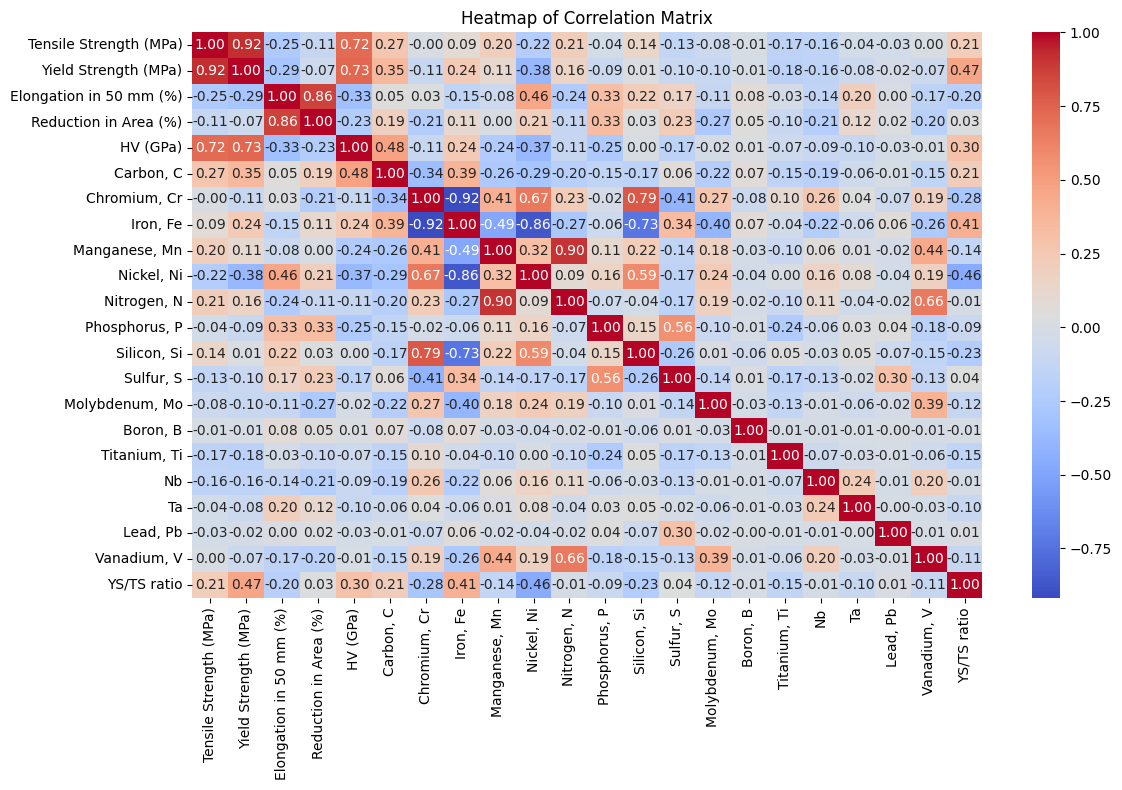

In [12]:
import seaborn as sns

import matplotlib.pyplot as plt
# Compute the correlation matrix
correlation_matrix = df.iloc[:, 1:].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Heatmap of Correlation Matrix')
plt.tight_layout()
plt.show()


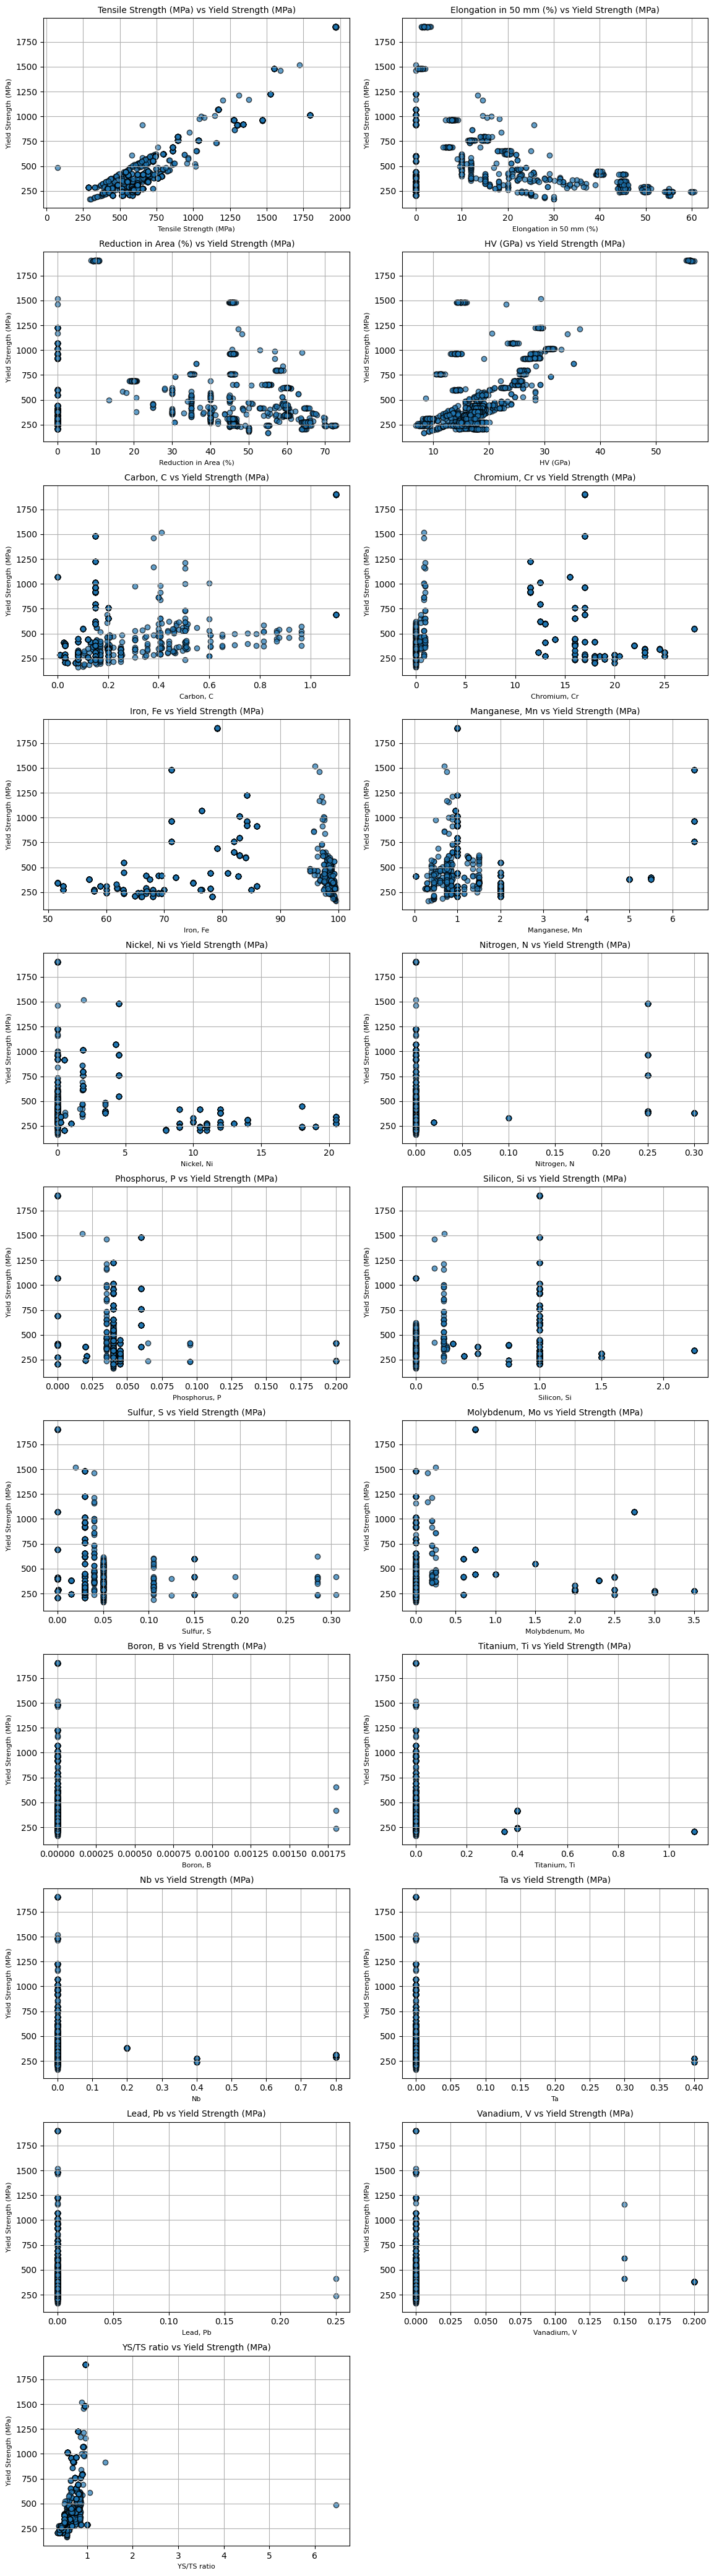

In [13]:
# Filter numeric columns excluding 'Yield Strength (MPa)'
numeric_columns = [col for col in df.columns if col != 'Yield Strength (MPa)' and df[col].dtype in ['float64', 'int64']]

# Create a single figure for all scatter plots with a side-by-side layout
num_columns = len(numeric_columns)
fig, axes = plt.subplots(nrows=(num_columns + 1) // 2, ncols=2, figsize=(12, num_columns * 2))
axes = axes.flatten()  # Flatten the axes array for easier indexing
fig.tight_layout(pad=3.0)

for i, column in enumerate(numeric_columns):
    axes[i].scatter(df[column], df['Yield Strength (MPa)'], alpha=0.7, edgecolor='k')
    axes[i].set_title(f'{column} vs Yield Strength (MPa)', fontsize=10)
    axes[i].set_xlabel(column, fontsize=8)
    axes[i].set_ylabel('Yield Strength (MPa)', fontsize=8)
    axes[i].grid(True)

# Hide any unused subplots
for j in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[j])

plt.show()


In [14]:
# Create train_df by dropping the specified columns
columns_to_exclude = [
    'Tensile Strength (MPa)','Elongation in 50 mm (%)','Reduction in Area (%)'
    # ,'Iron, Fe','Nitrogen, N', 'Boron, B', 'Titanium, Ti', 'Nb', 'Ta', 'Lead, Pb', 'Vanadium, V'
]
train_df = df.drop(columns=columns_to_exclude)

# Display the first few rows of train_df
train_df.head()

,Grade,Yield Strength (MPa),HV (GPa),"Carbon, C","Chromium, Cr","Iron, Fe","Manganese, Mn","Nickel, Ni","Nitrogen, N","Phosphorus, P","Silicon, Si","Sulfur, S","Molybdenum, Mo","Boron, B","Titanium, Ti",Nb,Ta,"Lead, Pb","Vanadium, V",YS/TS ratio
0,347,275.0,9.203853,0.080,17.000,68.0000,2.000,11.0,0.0,0.045,1.000,0.03,0.0,0.0000,0.0,0.4,0.4,0.0,0.0,0.419847
1,347,240.0,15.494393,0.080,17.000,68.0000,2.000,11.0,0.0,0.045,1.000,0.03,0.0,0.0000,0.0,0.4,0.4,0.0,0.0,0.387097
2,384,450.0,20.530071,0.080,16.000,63.0000,2.000,18.0,0.0,0.045,1.000,0.03,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.652174
3,384,240.0,7.786422,0.080,16.000,63.0000,2.000,18.0,0.0,0.045,1.000,0.03,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.466019
4,304,235.0,14.429154,0.505,0.525,97.8307,0.875,0.0,0.0,0.035,0.225,0.04,0.0,0.0018,0.0,0.0,0.0,0.0,0.0,0.401709


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout, BatchNormalization

# Prepare the data
X = train_df.drop(columns=['Yield Strength (MPa)', 'Grade'])
y = train_df['Yield Strength (MPa)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='tanh'),
    Dropout(0.2),
    Dense(64, activation='tanh'),
    Dropout(0.2),
    Dense(32, activation='tanh'),
    Dropout(0.2),
    Dense(16, activation='tanh'),
    BatchNormalization(),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dense(8, activation='relu'),
    BatchNormalization(),
    Dense(1)  
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])


/opt/anaconda3/envs/Python-mediapipe-0-10-9/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,689 (104.25 KB)

 Trainable params: 26,577 (103.82 KB)

 Non-trainable params: 112 (448.00 B)

In [16]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=16, verbose=1)


Epoch 1/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 349662.3750 - mse: 349662.3750 - val_loss: 375384.1250 - val_mse: 375384.1250
Epoch 2/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 351763.0625 - mse: 351763.0625 - val_loss: 374418.3750 - val_mse: 374418.3750
Epoch 3/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 353580.6250 - mse: 353580.6250 - val_loss: 373472.0312 - val_mse: 373472.0312
Epoch 4/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 384373.9375 - mse: 384373.9375 - val_loss: 371916.0938 - val_mse: 371916.0938
Epoch 5/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 353680.8438 - mse: 353680.8438 - val_loss: 370948.8438 - val_mse: 370948.8438
Epoch 6/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 348392.9375 - mse: 348392.9375 - val_loss: 370959.8125 - val_mse: 370959.8125
Epoch 7/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 318618.4062 - mse: 318618.4062 - val_loss: 368139.9688 - val_mse: 368139.9688
Epoch 8/1000
63/63 ━━━━━━━━━━━━━━━

Mean Squared Error on Test Data: 5537.12


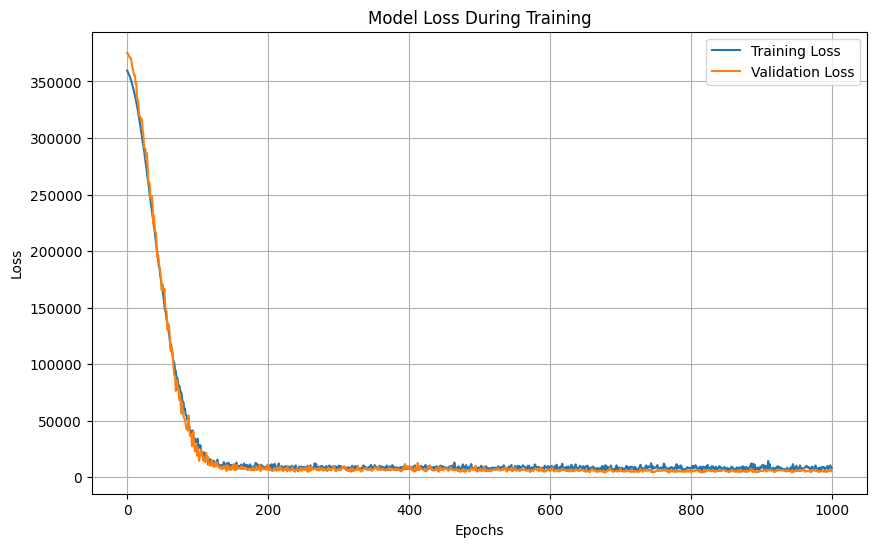

In [17]:

# Evaluate the model
loss, mse = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Squared Error on Test Data: {mse:.2f}")

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


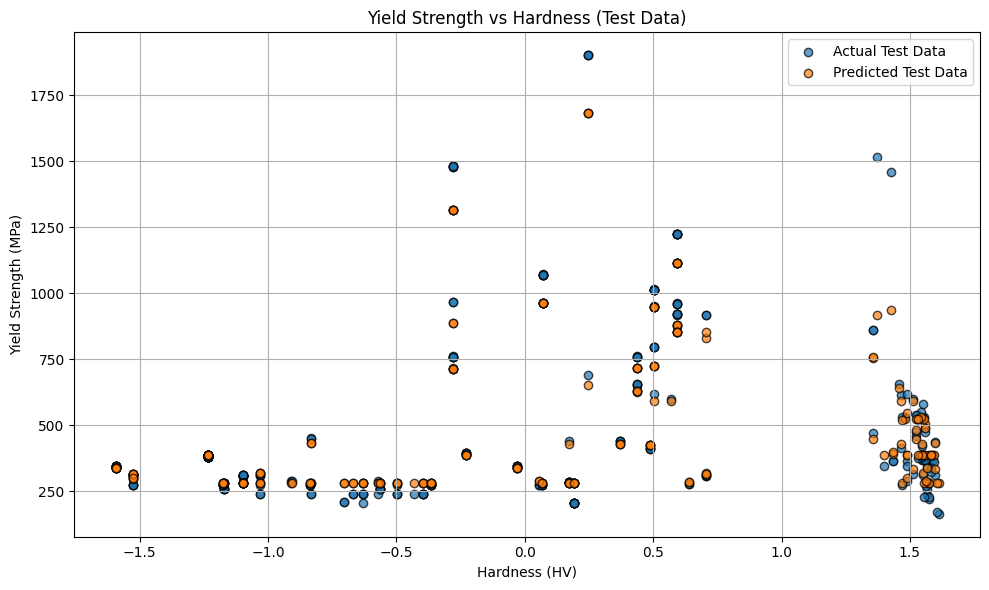

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step


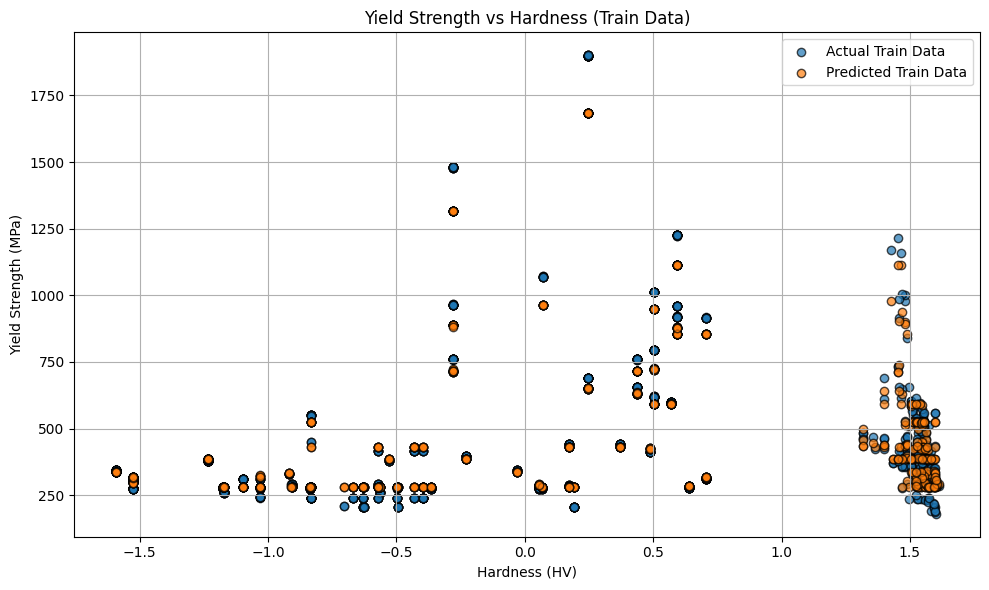

In [18]:
# Predict the yield strength for the test data
y_pred_test = model.predict(X_test)

# Plot for test data
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 3], y_test, label='Actual Test Data', alpha=0.7, edgecolor='k')
plt.scatter(X_test[:, 3], y_pred_test, label='Predicted Test Data', alpha=0.7, edgecolor='k')
plt.title('Yield Strength vs Hardness (Test Data)')
plt.xlabel('Hardness (HV)')
plt.ylabel('Yield Strength (MPa)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Predict the yield strength for the training data
y_pred_train = model.predict(X_train)

# Plot for training data
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 3], y_train, label='Actual Train Data', alpha=0.7, edgecolor='k')
plt.scatter(X_train[:, 3], y_pred_train, label='Predicted Train Data', alpha=0.7, edgecolor='k')
plt.title('Yield Strength vs Hardness (Train Data)')
plt.xlabel('Hardness (HV)')
plt.ylabel('Yield Strength (MPa)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R² for training data
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Calculate MSE and R² for testing data
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Training MSE: {mse_train:.2f}, R²: {r2_train:.2f}")
print(f"Testing MSE: {mse_test:.2f}, R²: {r2_test:.2f}")

Training MSE: 3017.66, R²: 0.97
Testing MSE: 5537.12, R²: 0.95


In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

# Prepare the data (removing HV and YS/TS ratio)
X = train_df.drop(columns=['Yield Strength (MPa)', 'Grade', 'HV (GPa)', 'YS/TS ratio'])
y = train_df['Yield Strength (MPa)']

# Standardize the data
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Function to recreate the ANN model
def create_ann_model(input_dim):
    model = Sequential([
        Dense(128, input_dim=input_dim, activation='relu'),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='tanh'),
        Dropout(0.2),
        Dense(64, activation='tanh'),
        Dropout(0.2),
        Dense(32, activation='tanh'),
        Dropout(0.2),
        Dense(16, activation='tanh'),
        BatchNormalization(),
        Dense(16, activation='relu'),
        BatchNormalization(),
        Dense(16, activation='relu'),
        BatchNormalization(),
        Dense(8, activation='relu'),
        BatchNormalization(),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])
    return model

# Train the baseline model
X_train_full, X_test_full, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

baseline_model = create_ann_model(X_train_full.shape[1])
baseline_model.fit(X_train_full, y_train, epochs=400, batch_size=32, verbose=0)
baseline_mse = baseline_model.evaluate(X_test_full, y_test, verbose=0)[0]


/opt/anaconda3/envs/Python-mediapipe-0-10-9/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/opt/anaconda3/envs/Python-mediapipe-0-10-9/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PermutationExplainer explainer: 252it [01:01,  3.64it/s]                         


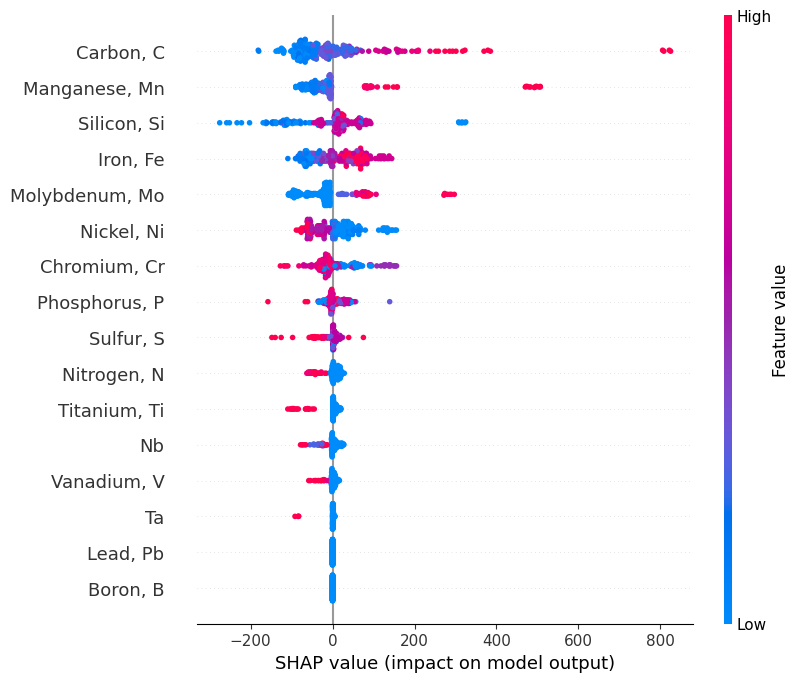

In [21]:
import shap

# Create SHAP explainer for the trained baseline model
explainer = shap.Explainer(baseline_model, X_train_full, feature_names=X.columns)

# Calculate SHAP values on test set
shap_values = explainer(X_test_full)

# SHAP beeswarm plot (summary of feature importance)
shap.plots.beeswarm(shap_values, max_display=20)  # adjust max_display if needed


In [22]:
from sklearn.metrics import mean_squared_error
import numpy as np

baseline_preds = baseline_model.predict(X_test_full).flatten()
baseline_mse = mean_squared_error(y_test, baseline_preds)

perm_importance = {}

for col in X_test_full.columns:
    X_permuted = X_test_full.copy()
    X_permuted[col] = np.random.permutation(X_permuted[col].values)

    perm_preds = baseline_model.predict(X_permuted).flatten()
    perm_mse = mean_squared_error(y_test, perm_preds)
    
    perm_importance[col] = perm_mse - baseline_mse

# Sort and plot like before


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step


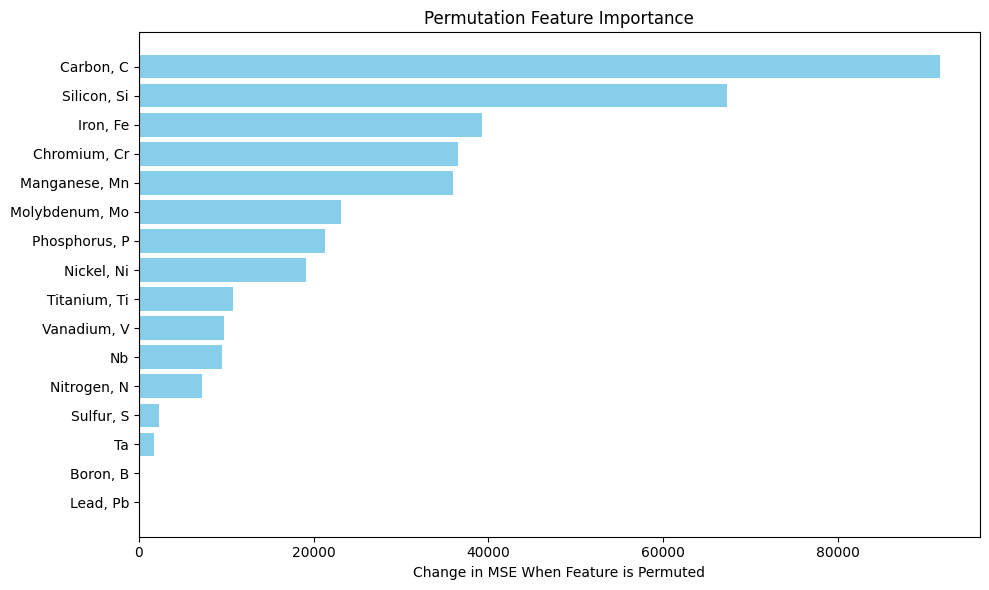

In [23]:
# Sort perm_importance by values
sorted_perm_importance = sorted(perm_importance.items(), key=lambda x: x[1], reverse=True)
features, importances = zip(*sorted_perm_importance)

# Plot the feature importances
plt.figure(figsize=(10, 6))
bars = plt.barh(features, importances, color='skyblue')
plt.axvline(0, color='gray', linestyle='--')  # Add a vertical line at 0 for reference

# Highlight negative bars (optional)
for bar, val in zip(bars, importances):
    if val < 0:
        bar.set_color('lightcoral')

plt.xlabel("Change in MSE When Feature is Permuted")
plt.title("Permutation Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.tight_layout()
plt.show()

In [1]:
# Activation functions
def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def linear(x):
    return x

# Activation function mapping for Keras
activation_map_name = {
    'relu': 'ReLU',
    'tanh': 'tanh',
    'linear': 'Linear'
}
activation_map_func = {
    'relu': relu,
    'tanh': tanh,
    'linear': linear
}

# Initialize storage
layers_info = []
forward_layers = []  # For computation

# Loop through each layer
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if len(weights) == 2:
        W, b = weights
        act_fn = getattr(layer, 'activation', None)
        act_name = act_fn.__name__ if act_fn else 'linear'
        act_display = activation_map_name.get(act_name, 'Linear')
        act_func = activation_map_func.get(act_name, linear)

        # Store display info
        layers_info.append({
            'index': i,
            'name': layer.name,
            'weights_shape': W.shape,
            'biases_shape': b.shape,
            'activation': act_display
        })

        # Store actual weights and functions for computation
        forward_layers.append({
            'W': W,
            'b': b,
            'activation': act_func
        })

        # Print layer info
        print(f"Layer {i} ({layer.name}):")
        print(f"  Activation: {act_display}")
        print(f"  Weights (shape {W.shape}):\n{W}")
        print(f"  Biases (shape {b.shape}):\n{b}\n")

# Define manual forward pass
def ann_forward(X_input):
    x = X_input
    for layer in forward_layers:
        W, b, activation = layer['W'], layer['b'], layer['activation']
        x = activation(np.dot(x, W) + b)
    return x


NameError: name 'model' is not defined

In [34]:
from gplearn.genetic import SymbolicRegressor

# Get ANN predictions
y_pred_ann = model.predict(X_train).flatten()

# Use symbolic regression to fit a symbolic equation to ANN predictions
sr = SymbolicRegressor(population_size=350,
                       generations=10,
                       stopping_criteria=0.01,
                       p_crossover=0.7,
                       p_subtree_mutation=0.1,
                       p_hoist_mutation=0.05,
                       p_point_mutation=0.1,
                       max_samples=0.9,
                       verbose=1,
                       parsimony_coefficient=0.001,
                       random_state=42)

sr.fit(X_train, y_pred_ann)

# Output symbolic equation
print(sr._program)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step
    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.59          683.029        7          431.702          442.195      2.10s
   1    22.00          489.588       31          368.417          360.794      1.78s
   2    29.19          1124.22       35          341.922          303.204      1.67s
   3    28.41          5658.62       35           333.59          377.534      1.36s
   4    33.22          13673.6       33          325.319          302.539      1.15s
   5    34.29          14116.9       47          309.665           314.59      0.92s
   6    35.41          7161.77       47          307.018          324.626      0.68s
   7    39.14          10739.7       53          295.785           280.91      0.49s
   8    38.01          7689.13    

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from gplearn.genetic import SymbolicRegressor

# Prepare the data for HV vs YS
X_hv = train_df[['HV (GPa)']].values  # Use only HV as the feature
y_ys = train_df['Yield Strength (MPa)'].values  # Target is Yield Strength

# Split the data into training and testing sets
X_train_hv, X_test_hv, y_train_ys, y_test_ys = train_test_split(X_hv, y_ys, test_size=0.2, random_state=42)

# Standardize the features
scaler_hv = StandardScaler()
X_train_hv = scaler_hv.fit_transform(X_train_hv)
X_test_hv = scaler_hv.transform(X_test_hv)

# Build the ANN model
model_hv = Sequential([
    Dense(128, activation='relu'),
    Dense(1)
])
model_hv.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# Train the model
model_hv.fit(X_train_hv, y_train_ys, epochs=500, batch_size=16, verbose=0)

# Predict YS using the trained model
y_pred_hv_train = model_hv.predict(X_train_hv).flatten()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step


In [18]:

# Perform symbolic regression to derive an equation
sr_hv = SymbolicRegressor(population_size=50,
                          generations=1,
                          stopping_criteria=0.01,
                          p_crossover=0.7,
                          p_subtree_mutation=0.1,
                          p_hoist_mutation=0.05,
                          p_point_mutation=0.1,
                          max_samples=0.9,
                          verbose=1,
                          parsimony_coefficient=0.001,
                          random_state=42)

sr_hv.fit(X_train_hv, y_pred_hv_train)

# Output the symbolic equation
print("Symbolic Regression Equation:")
print(sr_hv._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    51.00          14967.9       15           462.78           429.54      0.00s
Symbolic Regression Equation:
mul(add(mul(X0, X0), mul(X0, X0)), sub(div(X0, 0.161), mul(X0, -0.620)))


In [19]:
# Predict Yield Strength (YS) using the given equation
y_pred_equation = 13.66 * (X_test_hv.flatten() ** 3)

# Predict Yield Strength (YS) using the trained model
y_pred_model = model_hv.predict(X_test_hv).flatten()

# Compare the predictions
comparison_df = pd.DataFrame({
    'Actual YS': y_test_ys,
    'Predicted YS (Equation)': y_pred_equation,
    'Predicted YS (Model)': y_pred_model
})

# Display the first few rows of the comparison
print(comparison_df.head())

# Calculate and display the Mean Squared Error (MSE) for both predictions
mse_equation = mean_squared_error(y_test_ys, y_pred_equation)
mse_model = mean_squared_error(y_test_ys, y_pred_model)

print(f"Mean Squared Error (Equation): {mse_equation:.2f}")
print(f"Mean Squared Error (Model): {mse_model:.2f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step
    Actual YS  Predicted YS (Equation)  Predicted YS (Model)
0  274.729614                 0.002364            435.752258
1  260.493348                -0.005460            396.321655
2  274.967241                -0.004454            397.794189
3  329.483516                -0.131746            384.555786
4  379.492040                -0.103920            384.939972


NameError: name 'mean_squared_error' is not defined